In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pyvis.network import Network

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colormap = plt.cm.magma  # You can choose any other colormap, like 'viridis', 'plasma', 'inferno', 'magma', etc.

    # Normalize your values to be in the range [0, 1] if they are not already
    norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

    # Create a colormap scalar mappable
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])

    # Map your values to colors
    colors = [str_color(*colormap(norm(value))) for value in values]
    return colors

# Grahp density

0.4766666666666667


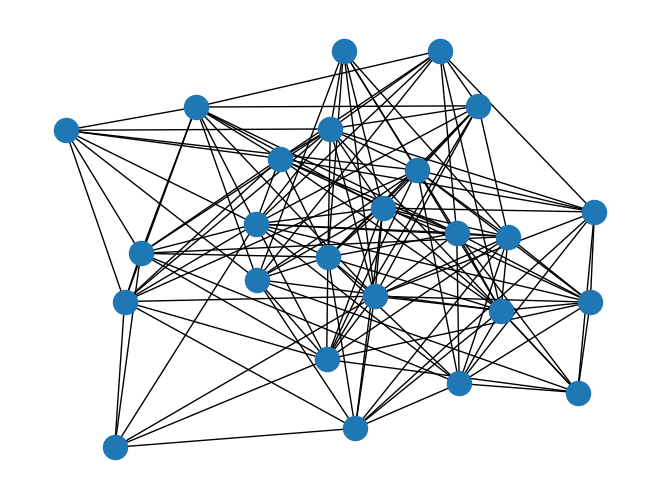

In [4]:
import networkx as nx

N = 25

total = (N*(N-1))/2
G = nx.gnp_random_graph(N,0.5)

M = G.number_of_edges()
print(M/total)

nx.draw(G)

# Distribución del grado
* **Degree:** https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html#degree
* **Degree histogram:** https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html#degree-histogram

## 2D Grid
Este código crea un grafo en forma de una malla bidimensional (grid), asigna colores a los nodos basándose en su grado (número de conexiones), y lo visualiza utilizando el algoritmo de disposición Kamada-Kawai.

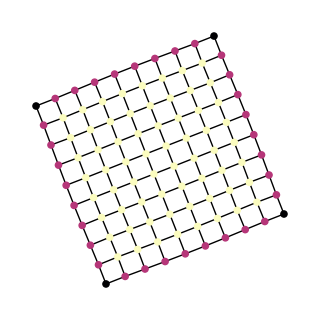

In [5]:
import matplotlib.pyplot as plt

G = nx.grid_2d_graph(10, 10)
colors = assign_colors([d for _,d in G.degree()])
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20)

<Axes: xlabel='degree', ylabel='frequency'>

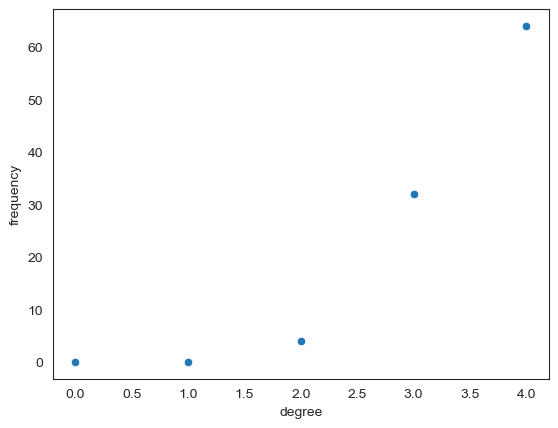

In [6]:
sns.set_style("white")
frequency = nx.degree_histogram(G)
data = pd.Series(frequency, name="frequency").reset_index().rename(columns={"index":"degree"})

sns.scatterplot(x="degree", y="frequency", data=data)

## Random graph

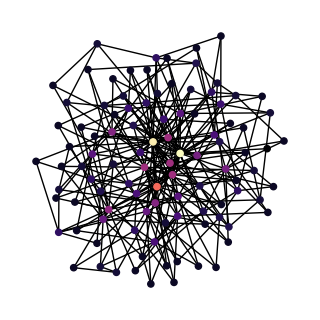

In [7]:
import networkx as nx

G = nx.barabasi_albert_graph(100, 3)

colors = assign_colors([d for _,d in G.degree()])
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20)

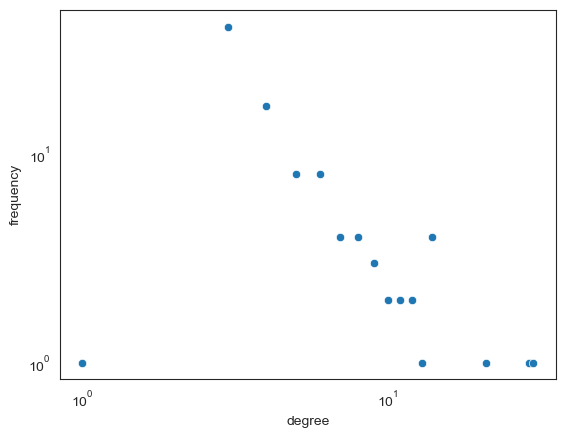

In [8]:
frequency = nx.degree_histogram(G)
data = pd.Series(frequency, name="frequency").reset_index().rename(columns={"index":"degree"})

sns.scatterplot(x="degree", y="frequency", data=data)
plt.yscale('log')
plt.xscale('log')

# Diametro, radio, centro y periferia
* **Diametro**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html#networkx.algorithms.distance_measures.diameter
* **Radio**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.radius.html#networkx.algorithms.distance_measures.radius
* **Centro**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.center.html#networkx.algorithms.distance_measures.center
* **Periferia**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.periphery.html#networkx.algorithms.distance_measures.periphery

## 2D Grid

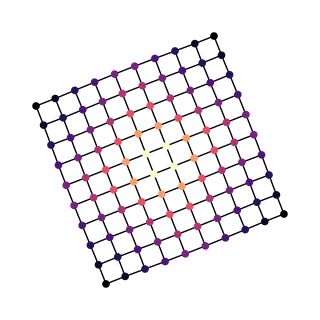

In [9]:
import matplotlib.pyplot as plt

G = nx.grid_2d_graph(10, 10)
colors = assign_colors([1/v for v in nx.eccentricity(G).values()])
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20)

In [10]:
diameter = nx.diameter(G)
radius = nx.radius(G)

print(f"Radio: {radius}")
print(f"Diametro: {diameter}")

Radio: 10
Diametro: 18


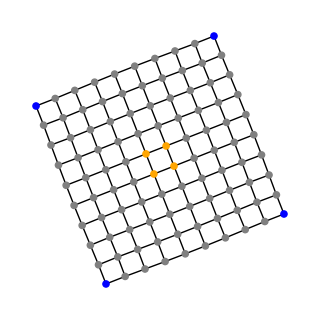

In [11]:
center = nx.center(G)
periphery = nx.periphery(G)

colors = ["orange" if n in center else "blue" if n in periphery else "gray" for n in G.nodes]
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20)

## Random Graph

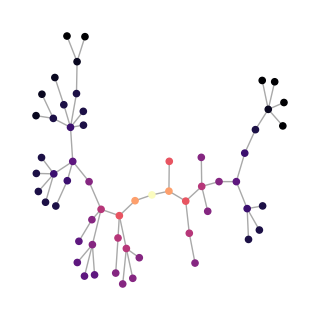

In [12]:
import networkx as nx

G = nx.random_lobster(15, 0.6, 0.5)

colors = assign_colors([1/v for v in nx.eccentricity(G).values()])
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20, edge_color="darkgray")

In [13]:
diameter = nx.diameter(G)
radius = nx.radius(G)

print(f"Radio: {radius}")
print(f"Diametro: {diameter}")

Radio: 9
Diametro: 18


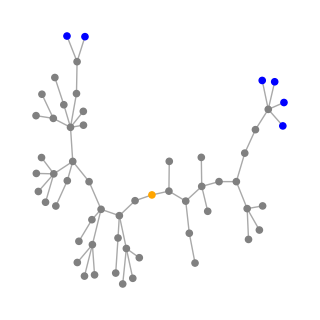

In [14]:
center = nx.center(G)
periphery = nx.periphery(G)

colors = ["orange" if n in center else "blue" if n in periphery else "gray" for n in G.nodes]
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, node_color=colors, node_size=20, edge_color="darkgray")

# Kemeny Constant
* https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.kemeny_constant.html#networkx.algorithms.distance_measures.kemeny_constant

In [15]:
def add_random_edges(G, n):
    nodes = set(G.nodes())
    for _ in range(n):
        source = np.random.choice(list(nodes))
        target = np.random.choice(list(nodes.difference({source})))
        G.add_edges_from([(source, target)])

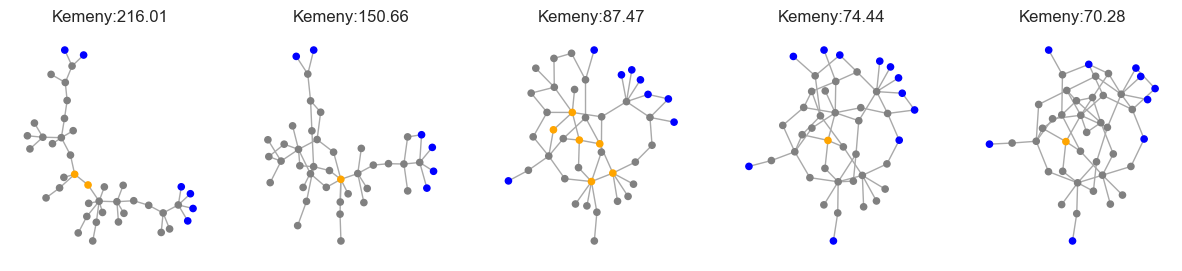

In [16]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))
G = nx.random_lobster(20, 0.6, 0.3)

for i in range(N):
    center = nx.center(G)
    periphery = nx.periphery(G)
    
    colors = ["orange" if n in center else "blue" if n in periphery else "gray" for n in G.nodes]
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Kemeny:{nx.kemeny_constant(G):.2f}")

    add_random_edges(G, 5)
    

# Algebraic connectivity
* https://networkx.org/documentation/stable/reference/generated/networkx.linalg.algebraicconnectivity.algebraic_connectivity.html#algebraic-connectivity

In [17]:
def remove_random_edges(G, n):
    edges = np.array(G.edges())
    selected = np.random.choice(np.array(range(G.number_of_edges())), n)
    G.remove_edges_from(list(edges[selected]))

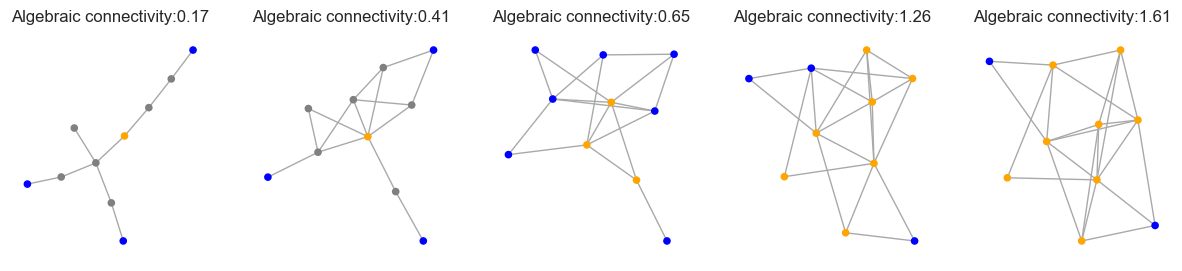

In [18]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))
G = nx.random_lobster(20, 0.6, 0.3)

for i in range(N):
    center = nx.center(G)
    periphery = nx.periphery(G)
    
    colors = ["orange" if n in center else "blue" if n in periphery else "gray" for n in G.nodes]
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Algebraic connectivity:{nx.algebraic_connectivity(G):.2f}")

    add_random_edges(G, 5)
    

## Compare

Before: ac=0.062, kc=58.92
After: ac=0.058, kc=116.68


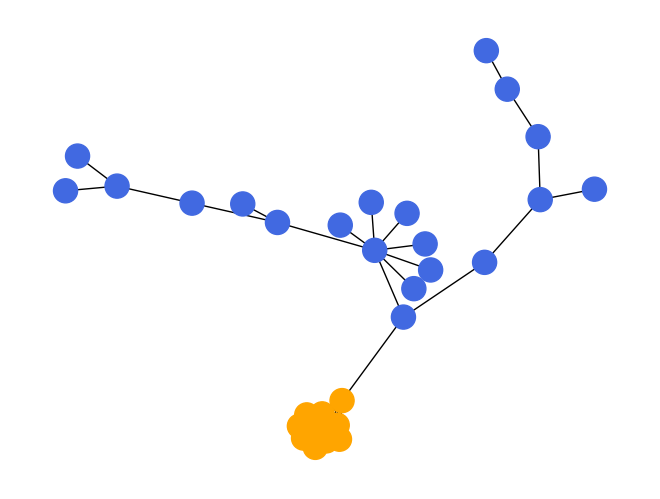

In [19]:
G = nx.random_lobster(20, 0.6, 0.01)
center = nx.center(G)
N = G.number_of_nodes()

print(f"Before: ac={nx.algebraic_connectivity(G):.3f}, kc={nx.kemeny_constant(G):.2f}")

sp = 2
G1 = nx.relabel_nodes(nx.complete_graph(int(N/sp)),{k:k+N for k in range(int(N/sp))})
G.add_nodes_from(G1.nodes)
G.add_edges_from(G1.edges)

for n in center:
    target = np.random.choice(G1.nodes)
    G.add_edge(n, target)

print(f"After: ac={nx.algebraic_connectivity(G):.3f}, kc={nx.kemeny_constant(G):.2f}")

color = ["royalBlue" if n < N else "orange" for n in G.nodes]
nx.draw(G, node_color=color)

# Transitivity
* https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html#transitivity

In [20]:
def remove_random_edges(G, n):
    edges = np.array(G.edges())
    selected = np.random.choice(np.array(range(G.number_of_edges())), n)
    G.remove_edges_from(list(edges[selected]))

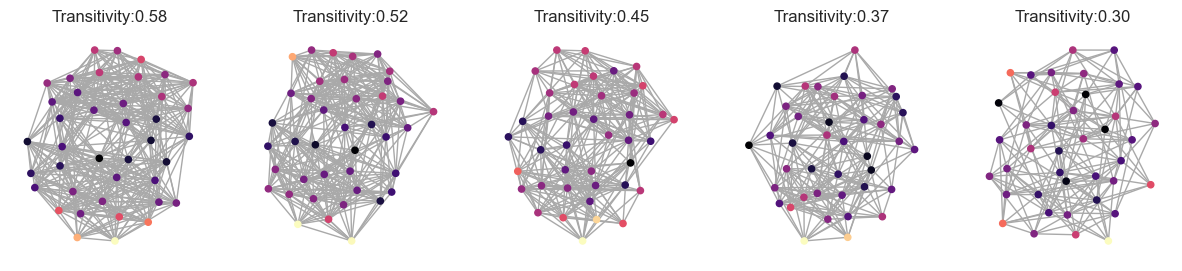

In [21]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))
G = nx.stochastic_block_model([20,20], [[0.8, 0.2],[0.2,0.8]]) # dos comunidades, [i][i] es nodos de una misma comunidad

for i in range(N):
    colors = assign_colors([v for v in nx.clustering(G).values()])
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Transitivity:{nx.transitivity(G):.2f}")

    remove_random_edges(G, 50)
    

### Comparacion

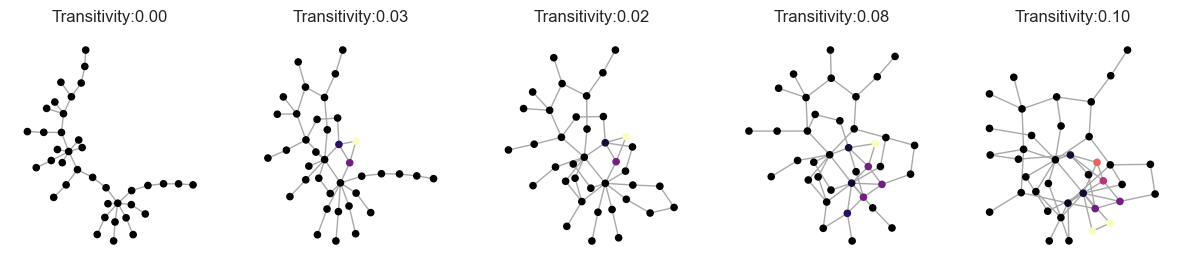

In [22]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))
G = nx.random_lobster(20, 0.6, 0.3)

for i in range(N):
    center = nx.center(G)
    periphery = nx.periphery(G)
    
    colors = assign_colors([v for v in nx.clustering(G).values()])
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Transitivity:{nx.transitivity(G):.2f}")

    add_random_edges(G, 5)
    

# Asortativity
* **Categorical**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#id1
* **Numerical**: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.numeric_assortativity_coefficient.html#networkx.algorithms.assortativity.numeric_assortativity_coefficient

- nx.numeric_assortativity_coefficient: Calcula la asortatividad basada en atributos numéricos (e.g., "age"), considerando su correlación como valores continuos o discretos.

- nx.attribute_assortativity_coefficient: Calcula la asortatividad basada en atributos categóricos (e.g., "color"), evaluando cómo se conectan nodos con etiquetas iguales.


In [23]:
import random

def random_community_graph(N, alpha=0.75, d=5):
    def select_target(src):
        coin = random.random()

        if coin < alpha:
            candidates = list(blues) if src in blues else list(oranges)
        else:
            candidates = list(G.nodes())

        candidates.remove(src)
        tar = np.random.choice(candidates)
        return tar

    def add_age(node):
        age = 5 if node in blues else 7
        G.nodes[node]["age"] = np.random.normal(age,1)
        
    G = nx.Graph()
    G.add_nodes_from(range(N))

    colors = np.random.choice(["royalBlue","orange"], N, replace=True)
    nx.set_node_attributes(G, {n:colors[n] for n in G.nodes}, "color")

    blues = np.argwhere(colors == "royalBlue").flatten()
    oranges = np.argwhere(colors == "orange").flatten()

    for src in range(N):
        add_age(src)
        for _ in range(d):
            tar = select_target(src)
            G.add_edge(src, tar)
            
    return G

## Categorical: color

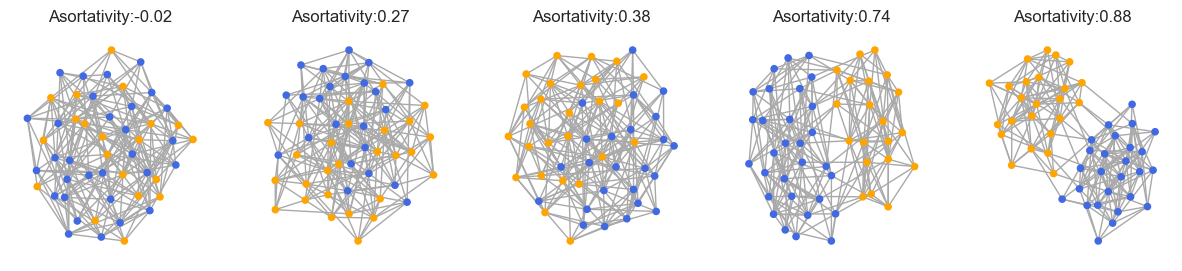

In [24]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))

for i,alpha in enumerate([0.1, 0.25, 0.5, 0.75, 0.9]):
    G = random_community_graph(50, alpha=alpha)

    colors = [d["color"] for _,d in G.nodes(data=True)]
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Asortativity:{nx.attribute_assortativity_coefficient(G, 'color'):.2f}")

## Numerical: Age

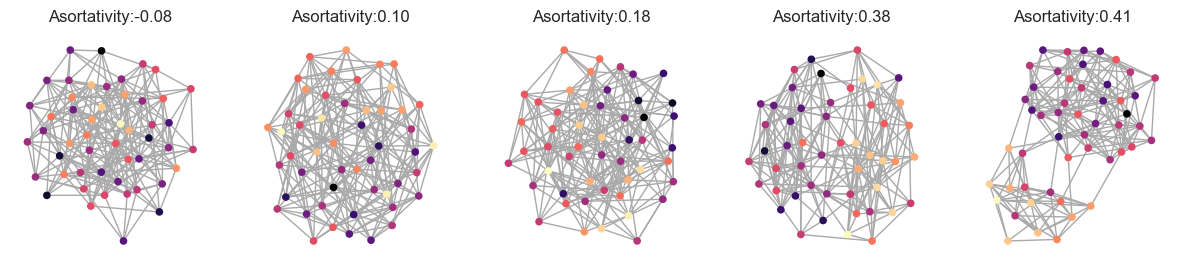

In [25]:
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))

for i,alpha in enumerate([0.1, 0.25, 0.5, 0.75, 0.9]):
    G = random_community_graph(50, alpha=alpha)

    colors = assign_colors([d["age"] for _,d in G.nodes(data=True)])
    nx.draw_kamada_kawai(G, ax=axs[i], node_color=colors, node_size=20, edge_color="darkgray")
    axs[i].set_title(f"Asortativity:{nx.numeric_assortativity_coefficient(G, 'age'):.2f}")

# Structural balance
* https://github.com/morpheusthewhite/social-balance

In [26]:
def add_weights(G, alpha=0.75):
    for src, tar in G.edges():
        c_src = G.nodes[src]['block']
        c_tar = G.nodes[tar]['block']
        
        if random.random() < alpha:
            G.edges[(src,tar)]["sign"] = 1 if c_src == c_tar else -1
        else:
            G.edges[(src,tar)]["sign"] = np.random.choice([-1,1])

In [27]:
from social_balance import frustration_model

G = nx.stochastic_block_model([20,20], [[0.8, 0.2],[0.2,0.8]])
N=5
fig, axs = plt.subplots(1, N, figsize=(N*3,3))

for i,alpha in enumerate([0.1, 0.25, 0.5, 0.75, 0.9]):
    add_weights(G, alpha)


    colors = ["royalBlue" if d["sign"] == 1 else 'orange' for _,_,d in G.edges(data=True)]
    nx.draw_kamada_kawai(G, ax=axs[i], node_color="black", edge_color=colors, node_size=20)
    axs[i].set_title(f"Frustation index:{frustration_model(G.number_of_edges(), [[s,t,d['sign']] for s,t,d in G.edges(data=True)]):.0f}")

ModuleNotFoundError: No module named 'social_balance'